## Project 2: Model Analysis Project
$Raphaël\space Tran$<br>
$Antoine\space Jouan$

For this model project, we have an economic model in which one company is producing.<br>

This company's production is affected by only two inputs: capital (K) and labour (L) which affects its output production.<br>
We will find the optimal values  $K*$ and $L*$ for which the company minimises the costs of production and optimises its production.<br>
We will solve this problem using the analytic and numerical method.<br>

The production follows a Cobb-Douglas function :<br>
$Q = K^{\alpha}L^{\beta}$<br>
And Budget constraint :<br>
$Y = wL + rK$<br>
In this model there is also a rental rate of capital $r$ and a rate of wages $w$ ( no values are assigned to them but we will assign values during the project)
###### What is the cost-minimizing capital-to-labor ratio?
To answer this question we will use the Marginal Rate of Substituion technique $(MRS)$.


In a second part, we will tackle another optimisation issue but from a Cost perspective.

In [9]:
import scipy as sp
import numpy as np
import sympy as sm
import matplotlib.pyplot as plt
from math import *

In [10]:
# Variables for the first part of the project
P = sm.symbols('P')
Y = sm.symbols('Y')
K = sm.symbols('K') 
L = sm.symbols('L')
r = sm.symbols('r')
w = sm.symbols('w')
alpha = sm.symbols('alpha')
beta = sm.symbols('beta')

# Second part
TC = sm.symbols('TC')
VC = sm.symbols('VC')
FC = sm.symbols('FC')
MC = sm.symbols('MC')
q = sm.symbols('q')
p = sm.symbols('p')

In [11]:
# We create our Cobb-Douglas function
Cobb = K**alpha*L**beta
Cobb

K**alpha*L**beta

In [12]:
# We create our budget constraint
budget_constraint= sm.Eq(w*L + r*K, Y)
budget_constraint

Eq(K*r + L*w, Y)

In [13]:
# We find what is the value of L based on the budget constraint
L_p = sm.solve(budget_constraint,L)

In [14]:
# Now we substitute its value inside the Cobb-Douglas function
Cobb_subs = Cobb.subs(L,L_p[0])
Cobb_subs

K**alpha*((-K*r + Y)/w)**beta

In [15]:
# We differenciate for K
diff_K = sm.diff(Cobb, K)
diff_K

K**alpha*L**beta*alpha/K

In [16]:
# We differenciate for L
diff_L = sm.diff(Cobb, L)
diff_L

K**alpha*L**beta*beta/L

In [17]:
# We compute the MRS
MRS = diff_K/diff_L

We now have the value of our Marginal rate of substitution which is :<br>
### $MRS = \frac{L\alpha}{K\beta}$

At $q^*$ which maximises output under the budget constraint, the <strong>MRS</strong> is equal to the differentiate of the constraint :<br>
Here, $w/r$

In [18]:
# Solve for K
a = sm.solve(sm.Eq(MRS, w/r), K)
a

[L*alpha*r/(beta*w)]

In [19]:
# We now substitue it in the budget constraint and we compute L*
b_con = budget_constraint.subs(K, a[0])
Lstar = sm.solve(b_con, L)
Lstar

[Y*beta*w/(alpha*r**2 + beta*w**2)]

In [20]:
# We now compute K*
b = sm.solve(sm.Eq(MRS, w/r), L)
Kstar = sm.solve(budget_constraint.subs(L, b[0]), K)
Kstar

[Y*alpha*r/(alpha*r**2 + beta*w**2)]

In [21]:
#We now substitute the values of K* and L* in our Cobb-Douglas function
c1 = Cobb.subs(K, Kstar[0])
c2 = c1.subs(L, Lstar[0])
c2

(Y*alpha*r/(alpha*r**2 + beta*w**2))**alpha*(Y*beta*w/(alpha*r**2 + beta*w**2))**beta

In [22]:
# We create the frontier of production curve
sol_eq = sm.Eq(c2, Cobb)
prod_frontier = sm.solve(sol_eq, K)
prod_frontier # Equation of the production frontier curve

[(L**(-beta)*(Y*alpha*r/(alpha*r**2 + beta*w**2))**alpha*(Y*beta*w/(alpha*r**2 + beta*w**2))**beta)**(1/alpha)]

###### Let's now solve this model analytically, by assigning values to our variables.

In [23]:
# Setting up the parameters
# We have constant returns to scale, so alpha + beta = 1
# Our model economy relies more on K than L, so alpha > beta
alpha = 2/3
beta = 1/3

# Now for the rate of return of K and wages of L
r = 1
w = 1

# Total output of the firm is 100
Y = 100

In [24]:
# Budget constraint curve
def b_constraint(L, r=r, w=w, Y=Y) :
    y = (Y-w*L)/r
    return y

# Production frontier curve
def prod(L, Y=Y, alpha=alpha, beta=beta) :
    y = (L**(-beta)*(Y*alpha*r/(alpha*r**2 + beta*w**2))**alpha*(Y*beta*w/(alpha*r**2 + beta*w**2))**beta)**(1/alpha)
    return y

# L* value
print(round(Y*beta*w/(alpha*r**2 + beta*w**2), 1))

# L- in the budget constraint (K*
print(round(b_constraint(Y*beta*w/(alpha*r**2+beta*w**2)), 1))

# L* in the production function (K*)
print(round(prod(Y*beta*w/(alpha*r**2 + beta*w**2)), 1))

33.3
66.7
66.7


We have the value of $L*$ and the value of $K*$ when we replace $L*$ by its value in both the budget constraint and the production function. <br>
We can see that the value are identical which means that we have the right value of $K*$. <br>
Now that we have our optimum values for Labor and Capital, we can create a graph to have a clearer vison of the model. <br>

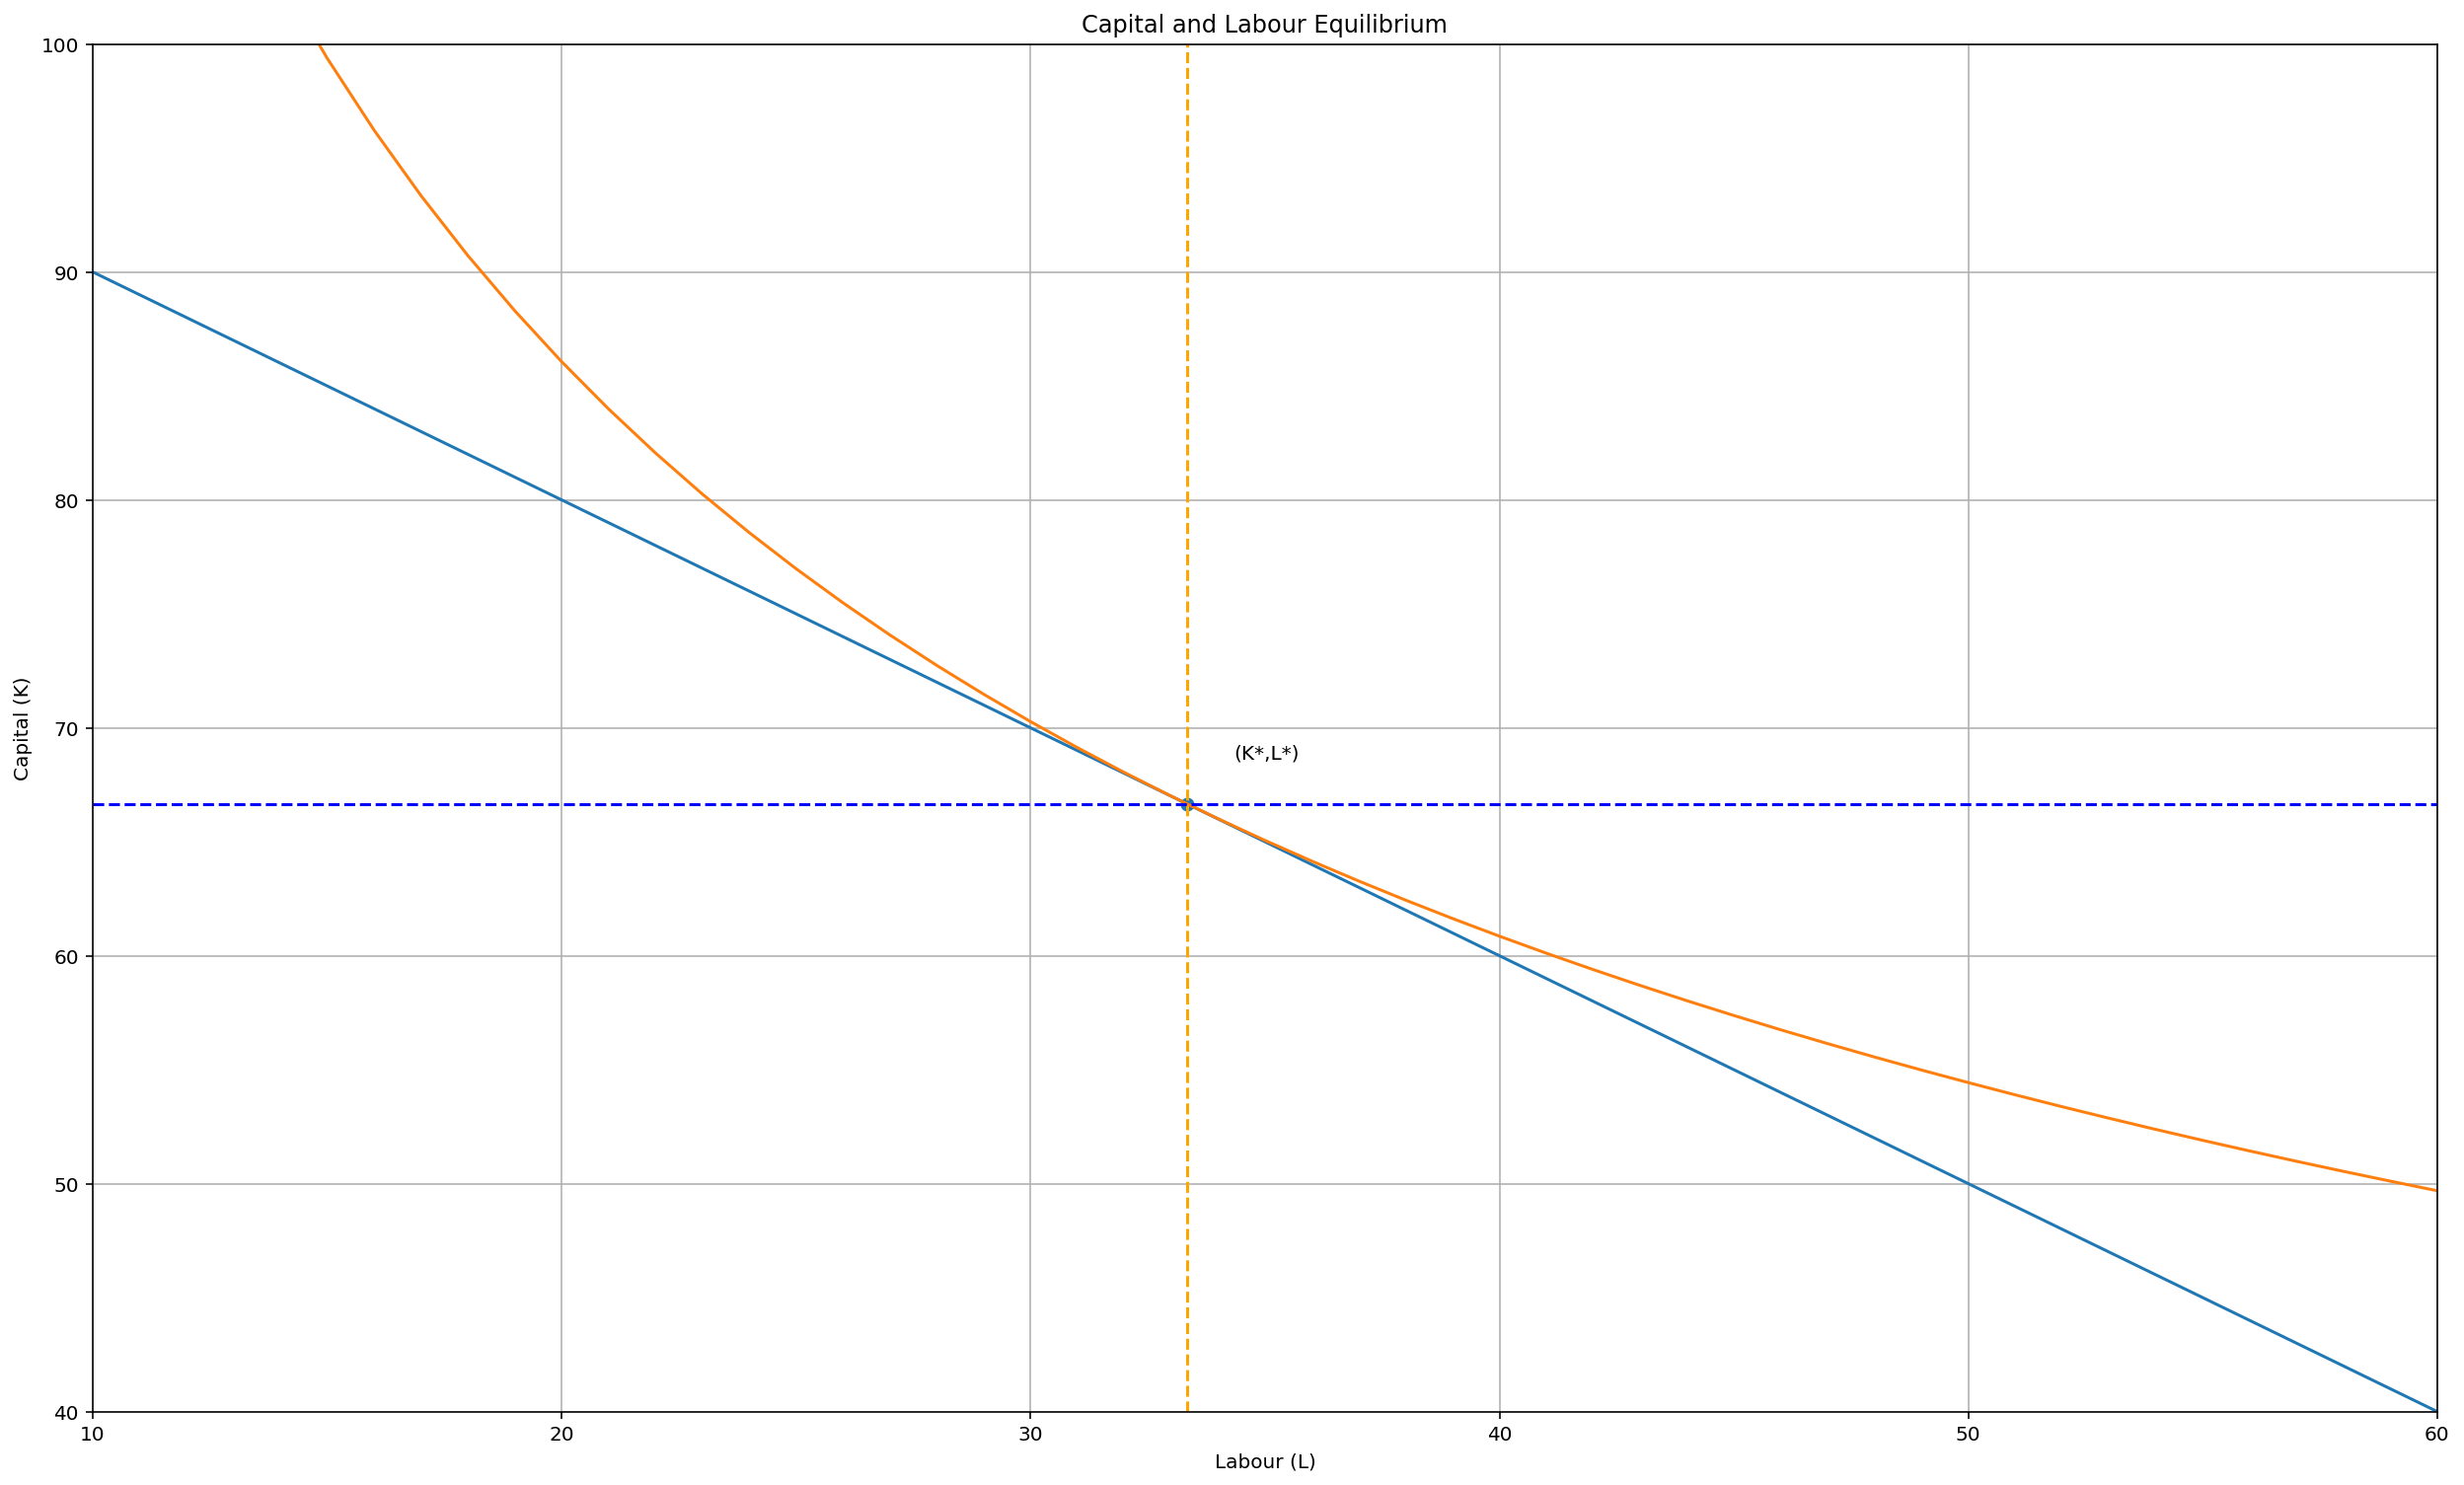

In [25]:
# setting the x - coordinates 
x = np.arange(10, 70, 1) 

# setting the corresponding y - coordinates 
y1 = b_constraint(x)
y2 = prod(x)

# potting the points 
plt.plot(x, y1) 
plt.plot(x, y2)
plt.grid(True)
plt.xlabel('Labour (L)')
plt.ylabel('Capital (K)')
plt.title('Capital and Labour Equilibrium')
yi = b_constraint(Y*beta*w/(alpha*r**2+beta*w**2))
xi = Y*beta*w/(alpha*r**2 + beta*w**2)
plt.scatter(xi,yi)
plt.axvline(x=xi,color='orange',linestyle='--')
plt.axhline(y=yi,color='blue',linestyle='--')
plt.text(xi+1,yi+2,r'(K*,L*)')
axes = plt.gca()
axes.set_xlim([10,60])
axes.set_ylim([40,100])


plt.subplots_adjust(top=1.5,right=1.5)


# function to show the plot 
plt.show()

This graph is showing the point where the production frontier ($orange\space curve$) is tangent to the budget constraint ($blue\space curve$).<br>
This point is the values of $K$ and $L$ $(K*,L*)$ that the company should chose to maximize it's profit and minimise the costs.<br>
From the results that we have, the company has to use two times more inputs of Capital ($K$) than of Labour ($L$) in order to maximise its profit

We can now move on to the second part of our project, the production optimisation for a firm, given a <strong>Cost function</strong>.



# Part 2
<p>Our cost function is made up of two parts :<br>
    First, the <strong>Variable costs</strong> are costs depending on the quantity of goods produced by the firm. As such, it is a function of q.<br>
    Second is the <strong>Fixed costs</strong>. We are on the short term, so the firm has basic production costs that it cannot get rid of as it could on the long term.</p>

In [26]:
# Setting up a variable costs function
variable_cost = q**2 + q     # We need values as it is a function of q

# Fixed costs
fixed_cost = FC  

# Total costs
total_cost = fixed_cost + variable_cost
total_cost

FC + q**2 + q

We want to find the values $q^*$ and $p^*$, with which the firm reaches its optimal level of production.

To that end, we need to set up some sub-functions of the total cost :

The Average cost, Marginal cost and Average Variable cost.

In [27]:
# Average cost
average_cost = total_cost / q
average_cost

(FC + q**2 + q)/q

In [28]:
# Marginal cost
marginal_cost = sm.diff(total_cost, q)
marginal_cost

2*q + 1

In [29]:
# Average Variable cost
average_vcost = variable_cost / q
sm.simplify(average_vcost)

q + 1

<p>The point of finding out these functions is to be able to cross them.<br>
   The quantity of the crossing point between the Marginal cost and the Average cost is the wanted $q^*$ value.<br>
   The quantity of the crossing point between the Marginal cost and the Average Variable cost is the quantity at which the firm doesn't gain money but only loses their Fixed costs, which is acceptable in the short term.</p>
   
 But first, let's find $q^*$ and $p^*$ analytically.


In [30]:
f = sm.Eq(average_cost, marginal_cost)
qstar = sm.solve(f, q)
qstar

[-sqrt(FC), sqrt(FC)]

We can't have a negative value for quantity of goods, so we keep the positive result.

In [31]:
pstar = marginal_cost.subs(q, qstar[1])
pstar

2*sqrt(FC) + 1

Our results are then :<br>
                        $(q^*, p^*) = (\sqrt{FC},\space2\sqrt{FC}+1)$

Now for the <strong>graphs</strong>.

In [32]:
# Functions in order to graph

# For graphing purposes, we will now use FC=100 
FC = 100    

# Marginal cost
def m_cost(q) :
    y = 2*q + 1
    return y

# Average cost
def a_cost(q) :
    y = (FC + q**2 + q)/q
    return y

# Average Variable cost
def a_vcost(q) :
    y = q + 1
    return y
    

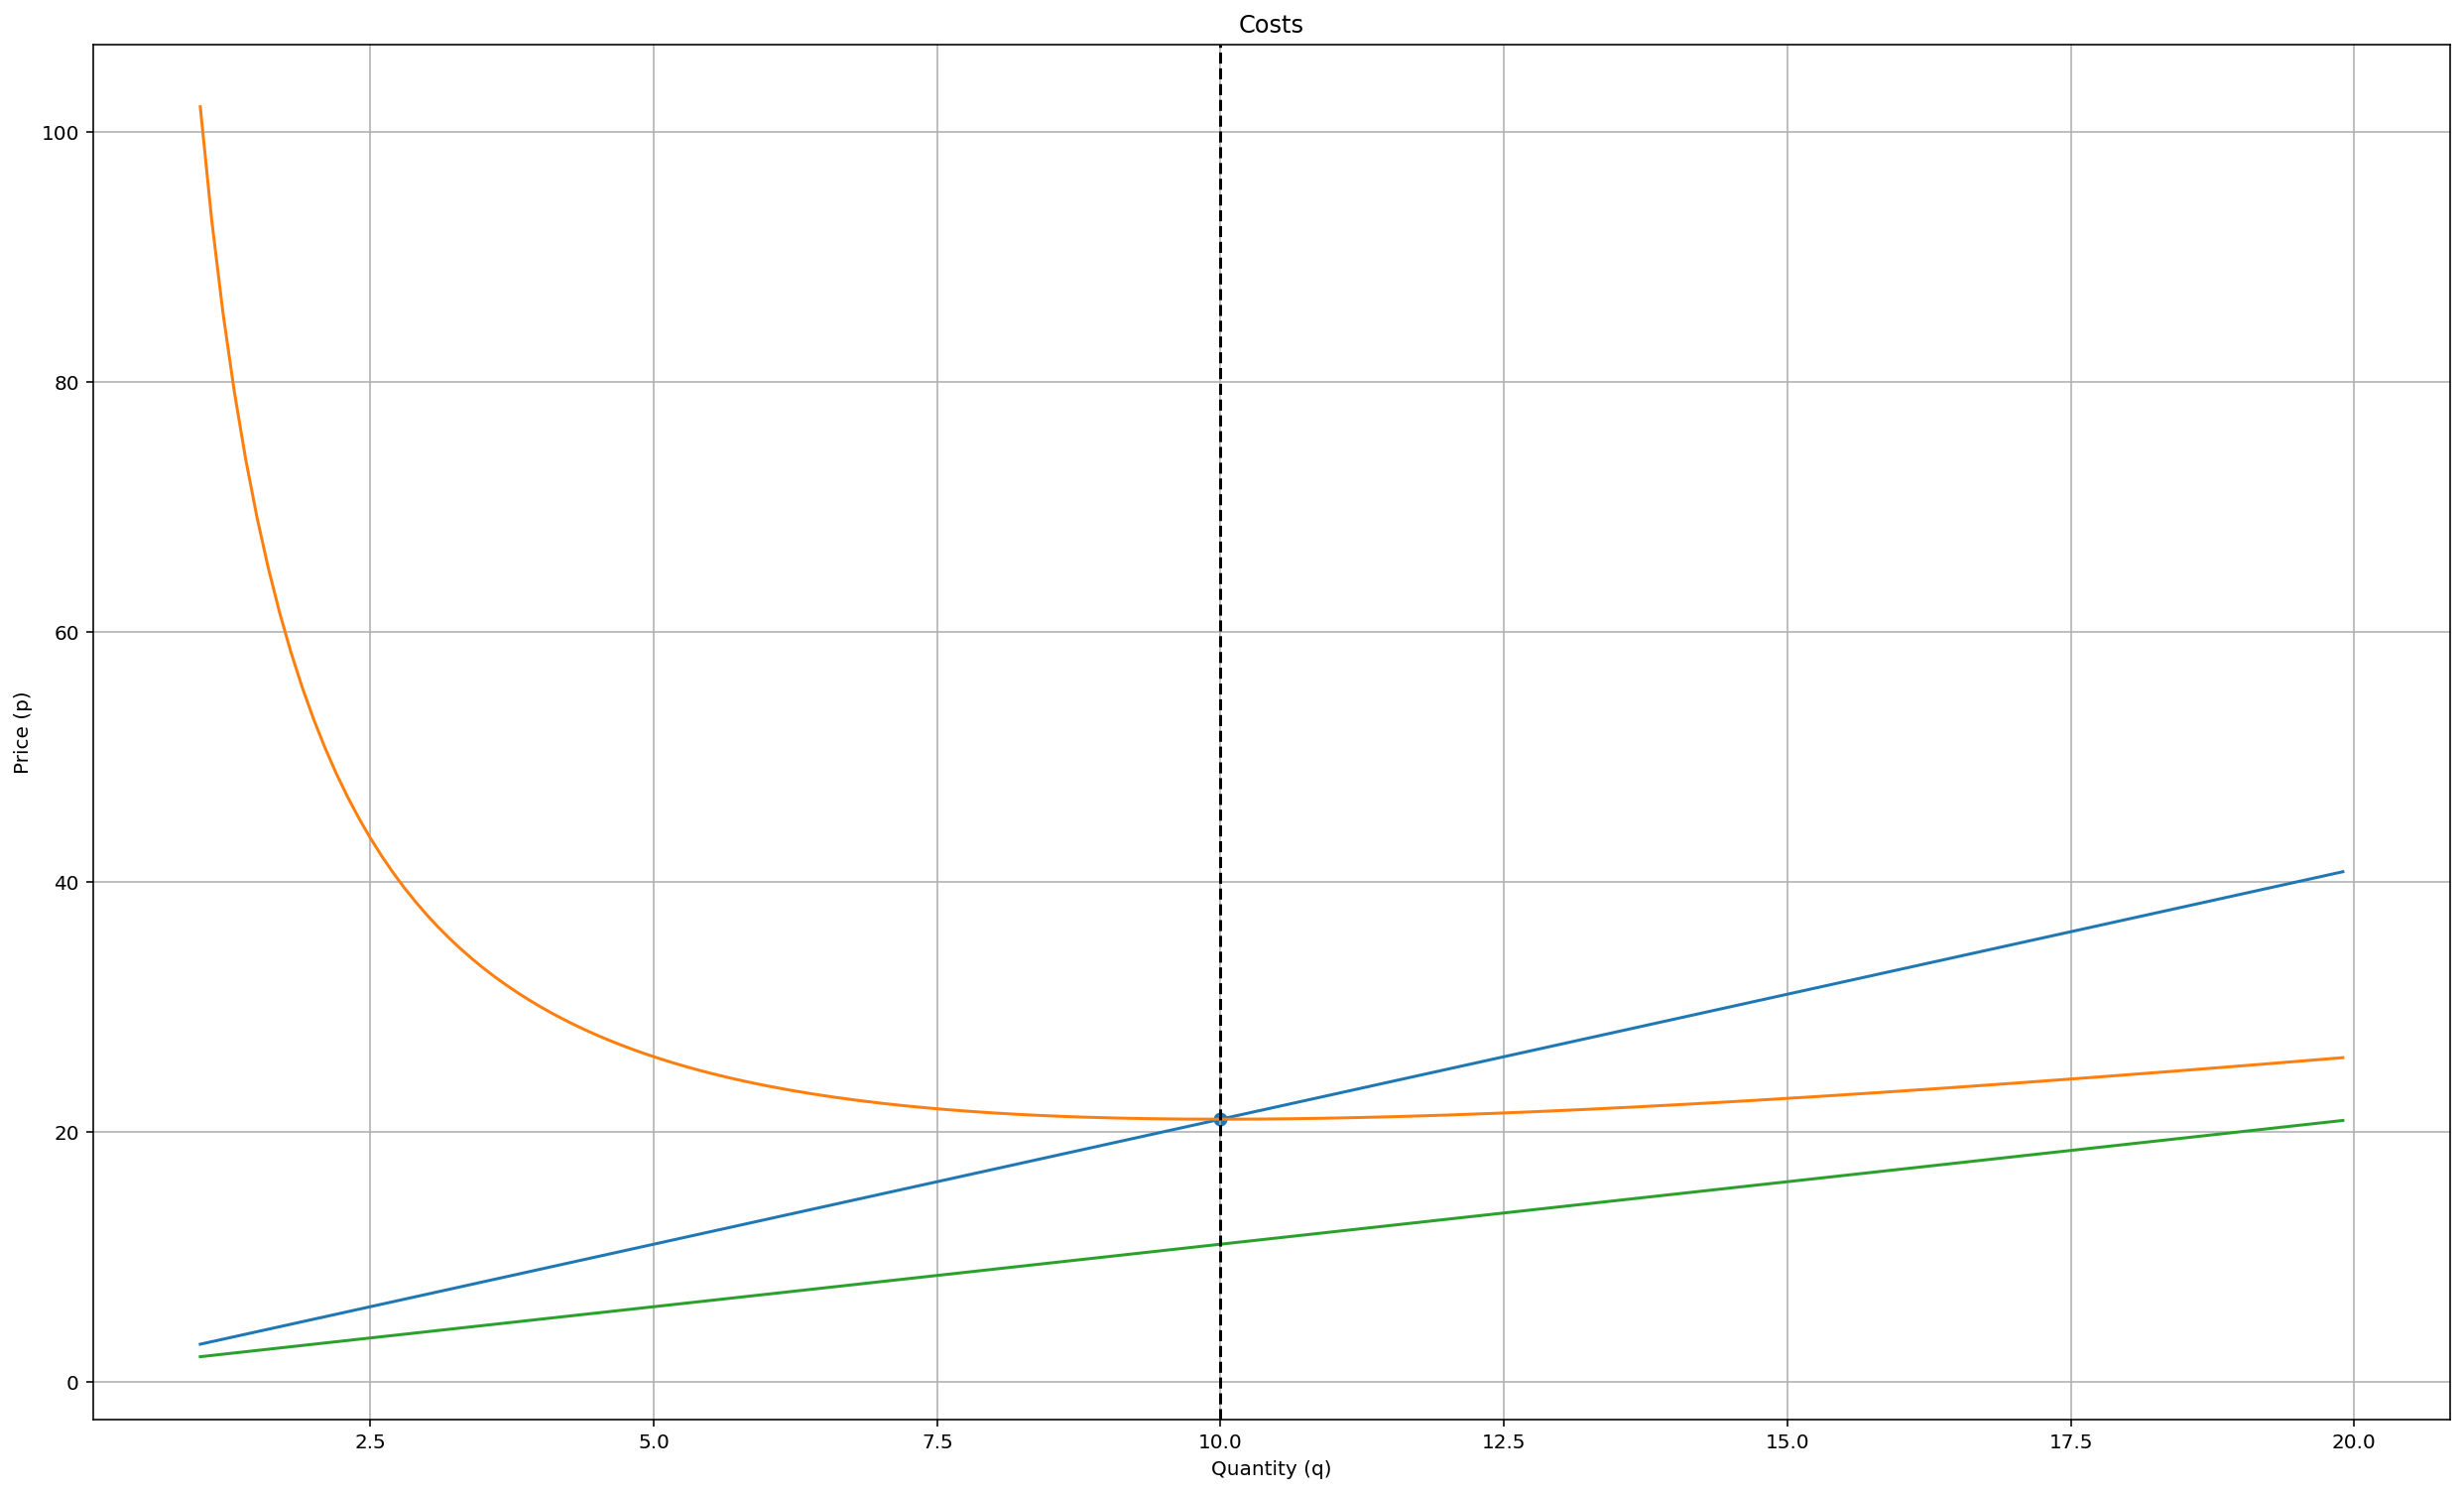

In [33]:
# Graph

# Setting the x - coordinates 
x = np.arange(1, 20, 0.1) 

# Setting the functions 
y1 = m_cost(x)
y2 = a_cost(x)
y3 = a_vcost(x)

# plotting the points 
plt.plot(x, y1) 
plt.plot(x, y2)
plt.plot(x, y3)
plt.grid(True)
plt.xlabel('Quantity (q)')
plt.ylabel('Price (p)')
plt.title('Costs')

# Highlight
xi = 10
yj = 2 * sqrt(100) + 1
plt.axvline(x=xi,color='black',linestyle='--')
plt.scatter(xi, yj)

# function to show the plot 
plt.subplots_adjust(top=1.5,right=1.5)
plt.show()

Crossing the marginal and average cost curves gives us the optimal values for quantity $q^*$ and prices $p^*$.

$q^*$ is in the Cobb-Douglas model also the value for the Production frontier.

The Production frontier is the quantity a firm in pure and perfect competition wants to attain.
It yields a profit equal to 0, the highest the profit curve can reach.

Let's now bring up the profit curve to see if it matches.

In [34]:
# Setting up profit 
income = pstar * q
profit = income - total_cost
profit

-FC - q**2 + q*(2*sqrt(FC) + 1) - q

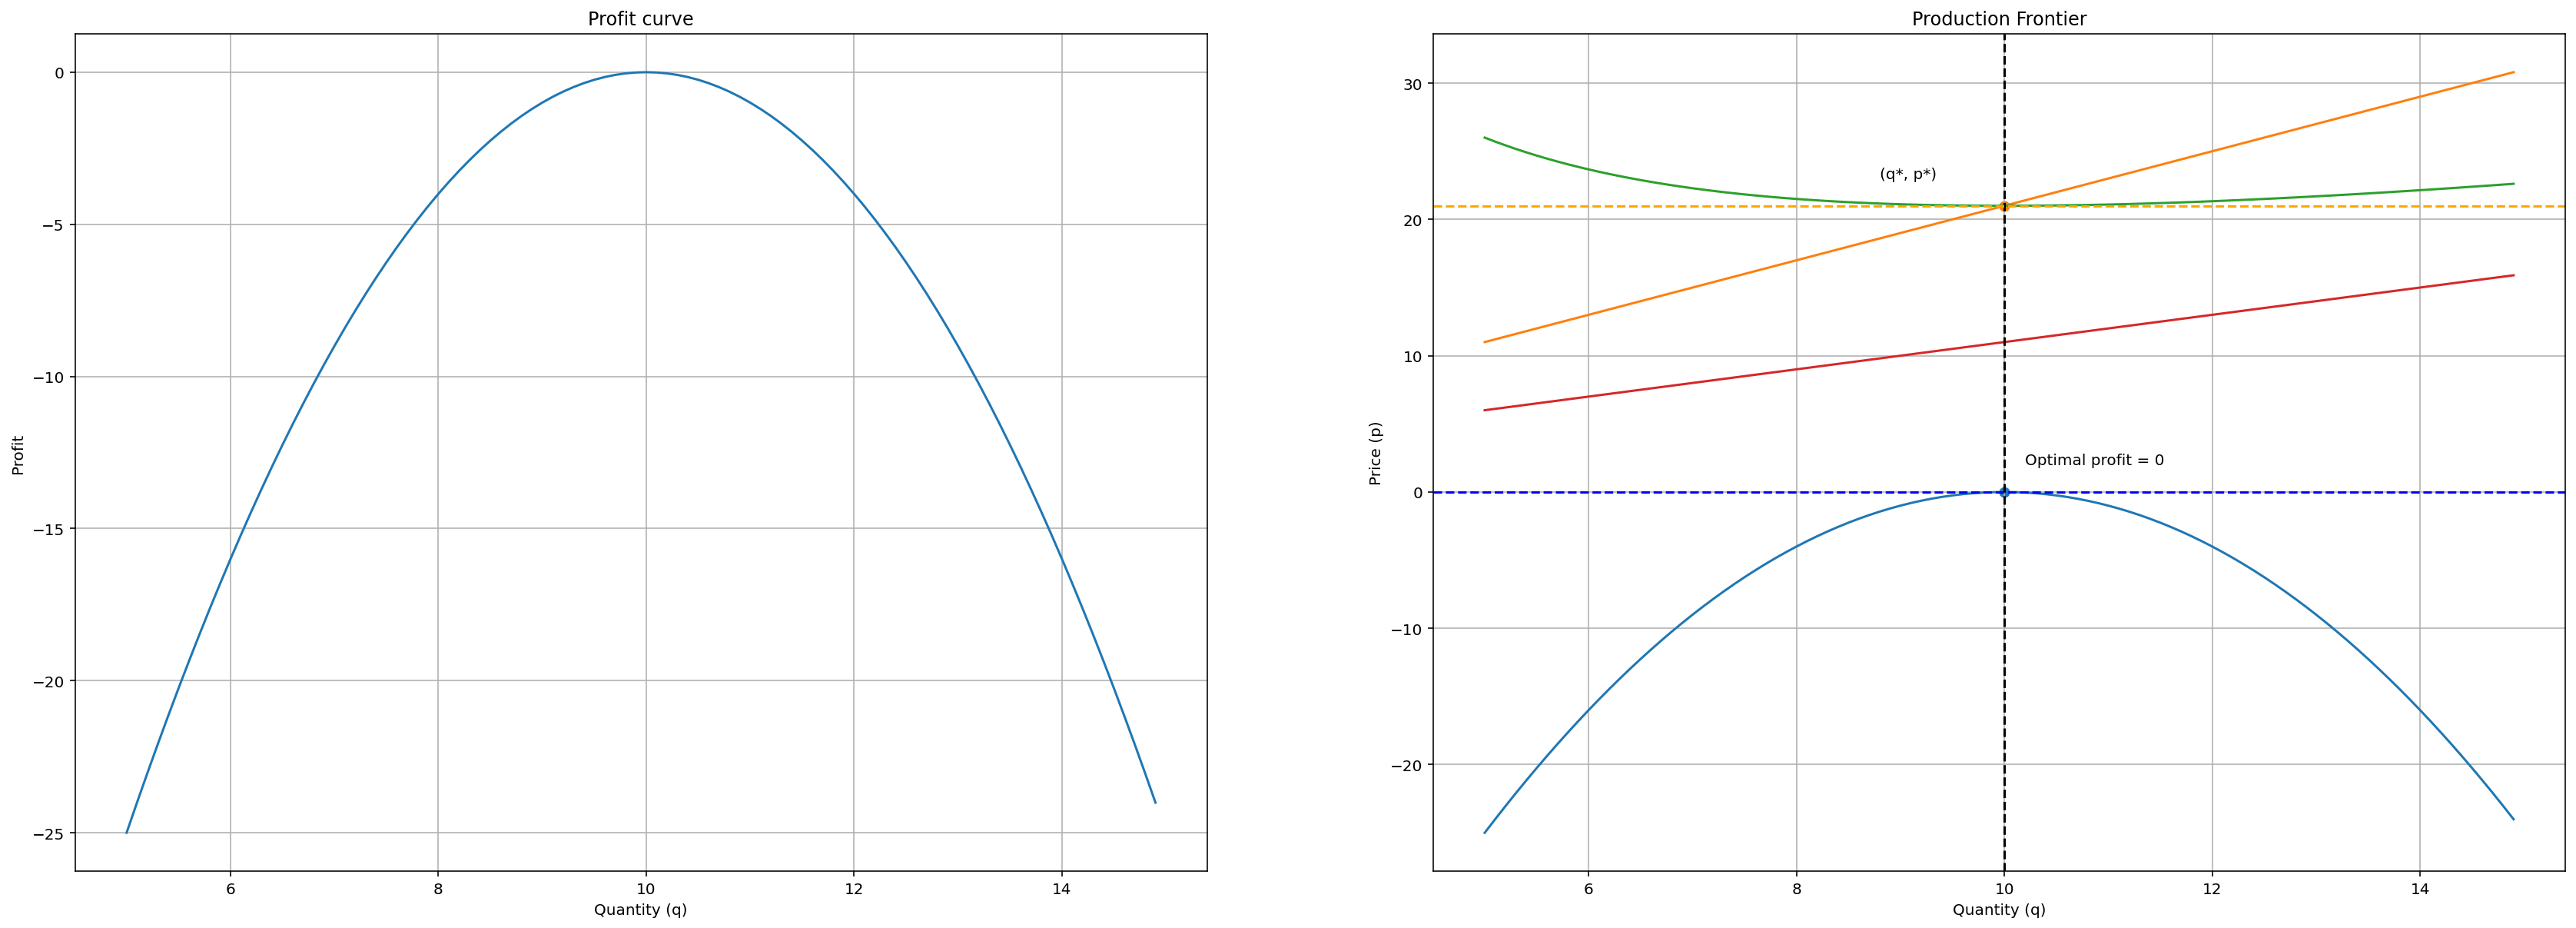

In [35]:
# Graphing Profit and the aggregate of curves

def profit_f(q):
    y = -FC - q**2 + q*(2*sqrt(FC)+1) - q
    return y

# Setting the x - coordinates 
x = np.arange(5, 15, 0.1) 

# Setting the functions
y = profit_f(x)
y1 = m_cost(x)
y2 = a_cost(x)
y3 = a_vcost(x)

# Plotting the profit curve 
plt.subplot(221)
plt.plot(x, y)
plt.grid(True)
plt.xlabel('Quantity (q)')
plt.ylabel('Profit')
plt.title('Profit curve')

# Putting it all together
plt.subplot(222)
plt.plot(x, y)
plt.plot(x, y1) 
plt.plot(x, y2)
plt.plot(x, y3)
plt.grid(True)
plt.xlabel('Quantity (q)')
plt.ylabel('Price (p)')
plt.title('Production Frontier')

# Setting up the coordinates
xi = 10
yi = 0
plt.axvline(x=xi,color='black',linestyle='--')
plt.axhline(y=yi,color='blue',linestyle='--')
plt.text(xi+0.2,yi+2,r'Optimal profit = 0')
plt.scatter(xi, yi)

yj = 2 * sqrt(FC) + 1
plt.axhline(y=yj,color='orange',linestyle='--')
plt.text(xi-1.2,yj+2,r'(q*, p*)')
plt.scatter(xi, yj)

# function to show the plot 
plt.subplots_adjust(top=2.5,right=2)
plt.show()

<p>The quantity $q^*$ is indeed the optimal choice for the company, since it yields a profit of 0.</p>
<p>This means that the amount of money earned by the firm is equal to the amount spent for production, investment etc.<br>
    It then doesn't have any useless money lying around, which would be unthinkable if you want to compete in a pure and perfect competition environment.</p>
   


# Conclusion
<p>In this project, we solved the Cobb-Douglas model from the firm's point of view, first from a production function with a budget constraint then from a cost function.<br>
    By solving it analytically then assigning real values in order to graph the results, we went about the problem step by step.<br>
    As such, we hope you understood the intricates of the Cobb-Douglas model and found our project clear and interesting.</p>
    
 ##### Thank you for reading.
    
    
